In [9]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
from tqdm.notebook import trange
from loguru import logger

# sys.path.append('..')
from training.src.data_processing import tfrecords as tfr
# import training.src.tfrecords as tfr

In [10]:
root = Path.cwd().parent
data = root / 'training' / 'data'
tfrec = data / 'tfrec'

In [33]:
df = pd.read_csv(data / 'train_full.csv')
# df2021 = df[df['dataset'] == '2021']
# df2021 = df[df['dataset'] == 2021]
# df2021 = pd.concat([df2021, df2022], ignore_index=True)
# df2021['dataset'] = 2021

In [35]:
df.loc[df['dataset'] == 2021, 'dataset'] = '2021'
df.loc[df['dataset'] == 2018, 'dataset'] = '2018'
df.loc[df['dataset'] == 2019, 'dataset'] = '2019'
df['dataset'].unique()

array(['2018', '2019', '2021', 'MO'], dtype=object)

In [36]:
df.loc[:, ["family", "genus", "class", "order", "phylum"]] = df.loc[:, ["family", "genus", "class", "order", "phylum"]].replace("[',]", "", regex=True)

In [22]:
df['family'].value_counts()

family
Strophariaceae       24140
Polyporaceae         17141
Amanitaceae          16656
Boletaceae           15639
Agaricaceae          13666
                     ...  
Phaeographidaceae       65
Entomophthoraceae       39
Bulgariaceae            25
Helotiaceae             24
Porpidiaceae            21
Name: count, Length: 132, dtype: int64

In [37]:
df[df['dataset'] == 'MO'][:10].values

array([['Fungi', 'Xylaria magnoliae', 'Xylariaceae', 'Ascomycota',
        'Xylariales', 'Xylaria', 'Sordariomycetes', '2.jpg', 480, 640,
        'MO',
        '/home/broug/Desktop/Mushroom-Classifier/data/MO/images/2.jpg',
        7153],
       ['Fungi', 'Volvopluteus gloiocephalus', 'Pluteaceae',
        'Basidiomycota', 'Agaricales', 'Volvopluteus', 'Agaricomycetes',
        '16.jpg', 480, 640, 'MO',
        '/home/broug/Desktop/Mushroom-Classifier/data/MO/images/16.jpg',
        7034],
       ['Fungi', 'Panellus stipticus', 'Mycenaceae', 'Basidiomycota',
        'Agaricales', 'Panellus', 'Agaricomycetes', '26.jpg', 480, 640,
        'MO',
        '/home/broug/Desktop/Mushroom-Classifier/data/MO/images/26.jpg',
        4738],
       [nan, 'Sutorius eximius', nan, nan, nan, 'Sutorius', nan,
        '36.jpg', 480, 640, 'MO',
        '/home/broug/Desktop/Mushroom-Classifier/data/MO/images/36.jpg',
        6519],
       ['Fungi', 'Harrya chromapes', 'Pyronemataceae', 'Ascomycota',
     

In [32]:
df

,kingdom,name,family,phylum,order,genus,class,file_name,height,width,dataset,file_path,class_id
0,Fungi,Phallus indusiatus,Phallaceae,Basidiomycota,Phallales,Phallus,Agaricomycetes,8d841f576d05e05f0b4b5513d549630a.jpg,800,600,2018,/home/broug/Desktop/Mushroom-Classifier/traini...,5006
1,Fungi,Phallus indusiatus,Phallaceae,Basidiomycota,Phallales,Phallus,Agaricomycetes,f84f23fe93f3fde53f7193e3cc08d473.jpg,600,800,2018,/home/broug/Desktop/Mushroom-Classifier/traini...,5006
2,Fungi,Phallus indusiatus,Phallaceae,Basidiomycota,Phallales,Phallus,Agaricomycetes,dabc337065c65a0ed19707c4a595bcb1.jpg,800,600,2018,/home/broug/Desktop/Mushroom-Classifier/traini...,5006
3,Fungi,Phallus indusiatus,Phallaceae,Basidiomycota,Phallales,Phallus,Agaricomycetes,8980532c8a1ef146bd3ed8d54f362b76.jpg,800,600,2018,/home/broug/Desktop/Mushroom-Classifier/traini...,5006
4,Fungi,Phallus indusiatus,Phallaceae,Basidiomycota,Phallales,Phallus,Agaricomycetes,2d3e29631fa00733061111743ceb734c.jpg,600,800,2018,/home/broug/Desktop/Mushroom-Classifier/traini...,5006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
326723,Fungi,Amanita velosa,Amanitaceae,Basidiomycota,Agaricales,Amanita,Agaricomycetes,NaN,480,640,MO,/home/broug/Desktop/Mushroom-Classifier/data/M...,372
326724,Fungi,Amanita velosa,Amanitaceae,Basidiomycota,Agaricales,Amanita,Agaricomycetes,NaN,480,640,MO,/home/broug/Desktop/Mushroom-Classifier/data/M...,372
326725,Fungi,Laricifomes officinalis,Fomitopsidaceae,Basidiomycota,Polyporales,Laricifomes,Agaricomycetes,NaN,480,640,MO,/home/broug/Desktop/Mushroom-Classifier/data/M...,3653
326726,Fungi,Laricifomes officinalis,Fomitopsidaceae,Basidiomycota,Polyporales,Laricifomes,Agaricomycetes,NaN,480,640,MO,/home/broug/Desktop/Mushroom-Classifier/data/M...,3653


In [41]:
df = df.drop_duplicates(subset='file_name')

In [ ]:
df.loc[df['dataset'] == 2021, 'family'] = df['family'].fillna(r'NA')
df.loc[df['dataset'] == 2021, 'order'] = df['order'].fillna(r'NA')
df.loc[df['dataset'] == 2021, 'image_dir'] = df.apply(lambda x: f"{x['kingdom']}_{x['phylum']}_{x['class']}_{x['order']}_{x['family']}_{x['genus']}_{'_'.join(x['name'])}", axis=1)
df.loc[df['dataset'] == 2021, 'file_path'] = df.apply(lambda x: f"{data}/raw/2021/train/{x['image_dir']}/{x['file_name']}", axis=1)

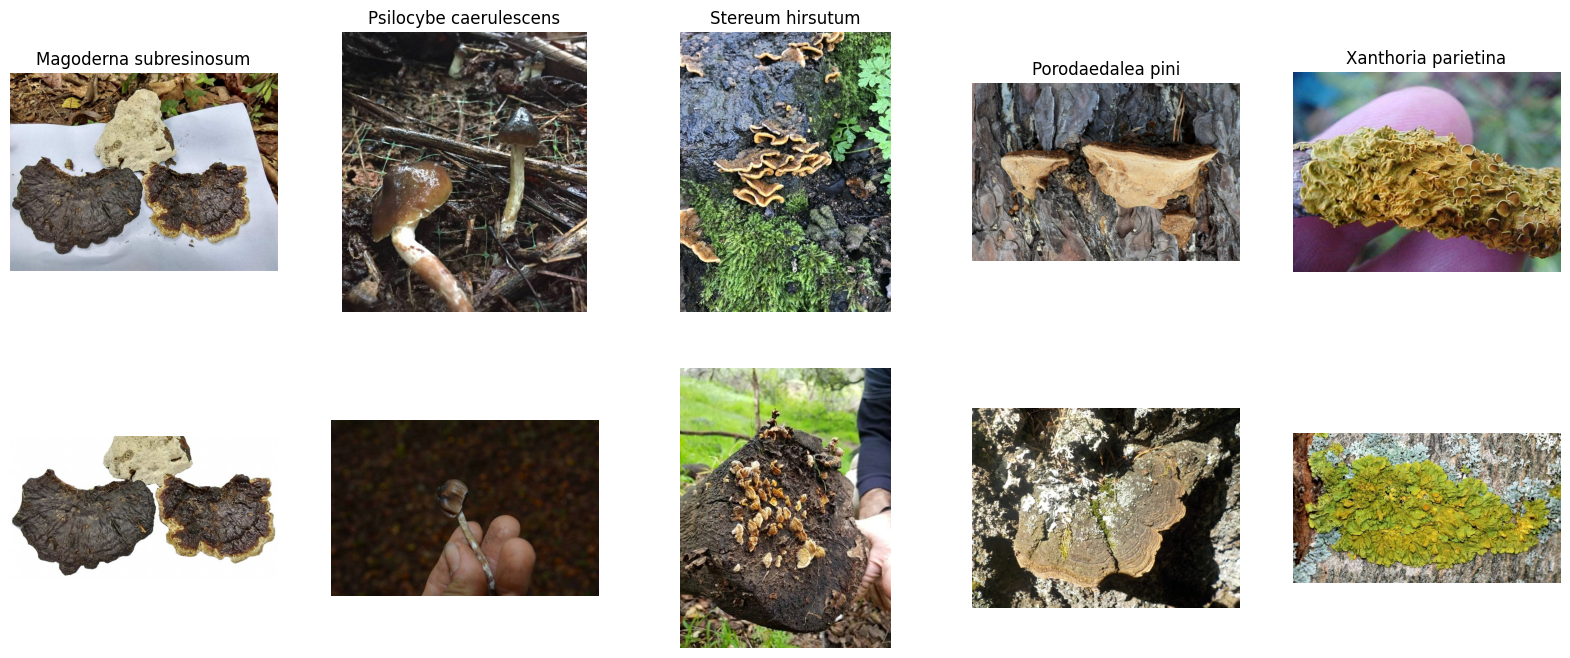

In [29]:
plt.figure(figsize=(20, 8))
classes = df['name'].sort_values().sample(5)
for i, cls in enumerate(classes, start=1):
    imgs = df[df['name'] == cls].sample(2)['file_path']
    for j, img in enumerate(imgs):
        im = cv2.imread(str(img))
        im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
        plt.subplot(2, 5, i + (j * 5))
        if j == 0:
            plt.gca().set_title(cls)
        plt.axis('off')
        plt.imshow(im)

In [23]:
tests = df[df['name'] == 'Morchella esculenta'][['file_path', 'file_name']].values.tolist()
len(tests)

7

In [17]:
test_list = ((tests[i*25:(i+1)*25] if i <= len(tests)//25 else tests[i*25:]) for i in range(len(tests)//25 + 1))

In [20]:
tlist = next(test_list)
len(tlist)

1

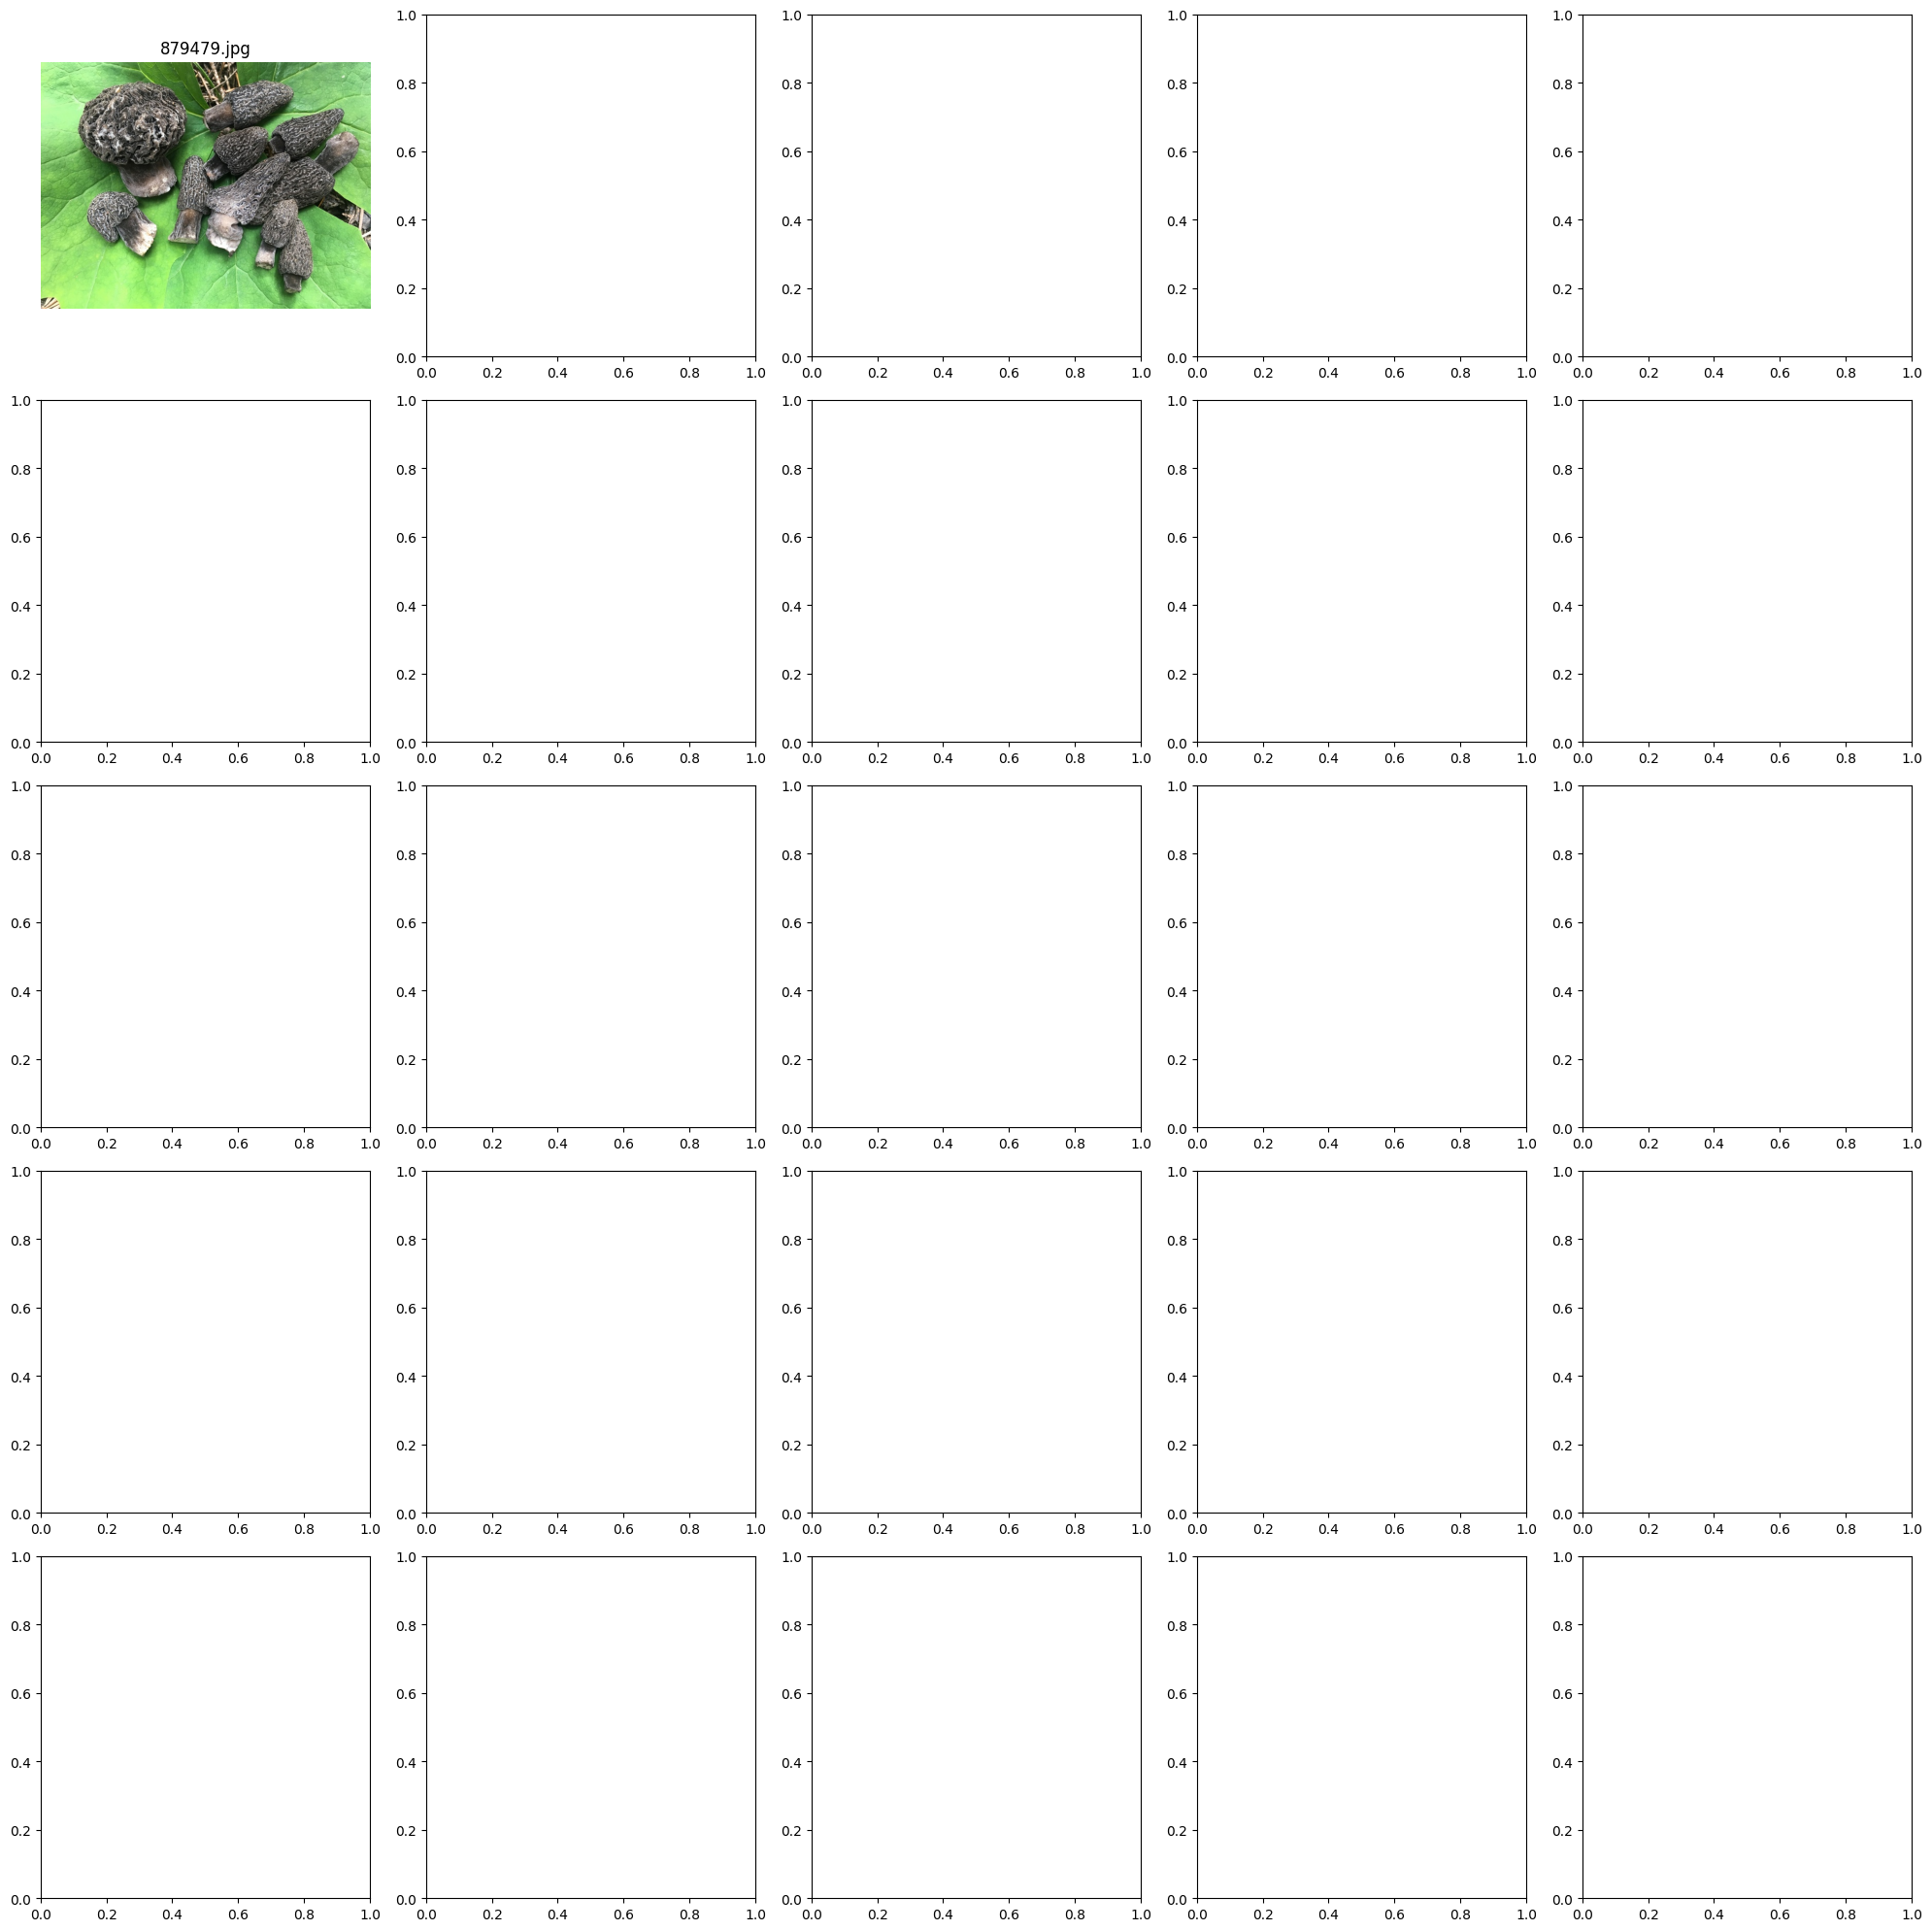

In [21]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20))

ax = axes.flatten()

for i, fp in enumerate(tlist):
    fp, fn = fp
    im = cv2.imread(str(fp))
    im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
    ax[i].imshow(im)
    ax[i].axis('off')
    ax[i].set_title(fn)
plt.tight_layout()
plt.show()

In [42]:
l2 = """529533:529537, 1186540:1186544, 1194817:1194827, 1194830:1194837, 1194838:1194843, 1194948:1194953, 284951:284958, 287468:287477, 394404:394417, 385006:385008, 385109:385112, 
391485:391499, 389360:389364, 405487:405490, 818050:818053, 1131265:1131269, 1134426:1134430, 1279831:1279833, 1280060:1280067, 1286684:1286687, 1292218:1292221, 
1279538:1279541, 1279542:1279547, 1279548:1279563, 1282801:1282803, 1286589:1286592, 1286624:1286628, 1286614:1286617, 1286672:1286675, 1290404:1290406"""

In [43]:
import re
# Regex pattern to find pairs of numbers separated by a colon
regex_pattern = r"(\d+):(\d+)"

# Find all matches and convert them into tuples of integers
tuples_list = [(int(match[0]), int(match[1])) for match in re.findall(regex_pattern, l2)]
tuples_list

[(529533, 529537),
 (1186540, 1186544),
 (1194817, 1194827),
 (1194830, 1194837),
 (1194838, 1194843),
 (1194948, 1194953),
 (284951, 284958),
 (287468, 287477),
 (394404, 394417),
 (385006, 385008),
 (385109, 385112),
 (391485, 391499),
 (389360, 389364),
 (405487, 405490),
 (818050, 818053),
 (1131265, 1131269),
 (1134426, 1134430),
 (1279831, 1279833),
 (1280060, 1280067),
 (1286684, 1286687),
 (1292218, 1292221),
 (1279538, 1279541),
 (1279542, 1279547),
 (1279548, 1279563),
 (1282801, 1282803),
 (1286589, 1286592),
 (1286624, 1286628),
 (1286614, 1286617),
 (1286672, 1286675),
 (1290404, 1290406)]

In [45]:
for n in tuples_list:
    dif = range(n[1]-n[0])
    dlist = [str(n[0] + i)+".jpg" for i in dif]
    df.drop(df[df['file_name'].isin(dlist)].index, inplace=True)

In [47]:
l = [ 522595, 330821, 333048, 330131, 330130, 148191, 620123, 620668, 624434, 736409, 736410, 736416, 737349, 737350, 737355, 739676, 740940, 740942,
870904, 870905, 1033193, 1033204, 1035031, 1035032, 1037394, 1037396, 118218, 118219, 1180220, 1187414, 1177796, 1177797, 
284939, 285140, 285588, 289168, 
393143, 389461, 389462, 490028, 819324, 819329, 1273138, 1134864,
1276987, 1279318, 1279536, 1286593, 
1286595, 1286600, 1286634, 1286606, 11286619, 1286638, 1286646, 1286649, 1286657, 1286679, 1286682, 
1286694, 1286696, 1286702, 1286705, 1290398, 129414, 1292206, 1292213, 1292900, 1292904, 1292906, ]
l = [str(x) + ".jpg" for x in l]

In [48]:
df = df.drop(df[df['file_name'].isin(l)].index)

In [51]:
df.loc[df['dataset'] == '2019', "file_path"] = df.loc[df['dataset'] == '2019', "file_path"].replace(r"train_val2019/", '', regex=True)

In [53]:
df.to_csv(data / 'train_full.csv', index=False)

In [25]:
df = df.sample(frac=1).sample(frac=1).reset_index(drop=True)

In [26]:
num_train_records = 599
IMGS = df.loc[:, 'file_path'].to_list()
SIZE = len(IMGS) // num_train_records
CT = len(IMGS) // SIZE + int(len(IMGS) % SIZE != 0)

In [27]:
# iterate over the number of tfrecords
for j in range(CT):
    logger.info(f"Writing {j:02d} of {CT} tfrecords")
    CT2 = min(
        SIZE, len(IMGS) - j * SIZE
    )  # get the number of images in a tfrecord

    # create the path to write the tfrecord to
    path = tfrec / "tfrecords-jpeg-raw"
    path.mkdir(parents=True, exist_ok=True)

    with tf.io.TFRecordWriter(
        str(path / f"train{j:02d}-{CT2}.tfrec")
    ) as writer:

        # Iterate through the rows of the dataframe
        for k in range(CT2):  # , leave=False)
            # if k % 100 == 0:
                # logger.info(f"Writing {k:02d} of {CT2} train tfrecord images")
            row = df[df['file_path'] == IMGS[SIZE * j + k]].iloc[0]
            # load image from disk, change RGB to cv2 default BGR format, resize to reshape_sizes and encode as jpeg
            img = cv2.imread(row.file_path)
            img = cv2.imencode(".jpg", img)[1].tobytes()

            # Serialize data
            example = tfr.serialize_example(
                img,
                str(row.file_name).split(".")[0].encode('utf8'),
                row.width,
                row.height,
                row.class_id,
            )
            writer.write(example)

2023-12-07 05:11:32.256 | INFO     | __main__:<module>:3 - Writing 00 of 600 tfrecords
2023-12-07 05:12:02.389 | INFO     | __main__:<module>:3 - Writing 01 of 600 tfrecords
2023-12-07 05:12:32.398 | INFO     | __main__:<module>:3 - Writing 02 of 600 tfrecords
2023-12-07 05:13:01.804 | INFO     | __main__:<module>:3 - Writing 03 of 600 tfrecords
2023-12-07 05:13:31.623 | INFO     | __main__:<module>:3 - Writing 04 of 600 tfrecords
2023-12-07 05:14:01.935 | INFO     | __main__:<module>:3 - Writing 05 of 600 tfrecords
2023-12-07 05:14:31.550 | INFO     | __main__:<module>:3 - Writing 06 of 600 tfrecords
2023-12-07 05:15:01.250 | INFO     | __main__:<module>:3 - Writing 07 of 600 tfrecords
2023-12-07 05:15:30.638 | INFO     | __main__:<module>:3 - Writing 08 of 600 tfrecords
2023-12-07 05:15:59.798 | INFO     | __main__:<module>:3 - Writing 09 of 600 tfrecords
2023-12-07 05:16:28.992 | INFO     | __main__:<module>:3 - Writing 10 of 600 tfrecords
2023-12-07 05:16:58.927 | INFO     | __main

In [ ]:
!gsutil -m cp -r {data}/tfrec/tfrecords-jpeg-raw/* gs://mush-img-repo/tfrecords-jpeg-raw

In [103]:
cv2.imread('/home/broug/Desktop/Mushroom-Classifier/data/MO/images/1039869.jpg')

In [112]:
df.drop(df[df['file_name'] == '1039869.jpg'].index)

In [8]:
df[df['file_name'] == '1039869.jpg']['file_path'].values

array(['/home/broug/Desktop/Mushroom-Classifier/data/MO/images/1039869.jpg'],
      dtype=object)

In [120]:
df.iloc[6555:6559].values

array([[nan, 'Heterobasidion occidentale', nan, nan, nan,
        'Heterobasidion', nan, '643358.jpg', 480, 640, 'MO',
        '/home/broug/Desktop/Mushroom-Classifier/data/MO/images/642487.jpg',
        2864],
       ['Fungi', 'Dacrymyces chrysospermus', 'Dacrymycetaceae',
        'Basidiomycota', 'Dacrymycetales', 'Dacrymyces',
        'Tremellomycetes', '728038.jpg', 480, 640, 'MO',
        '/home/broug/Desktop/Mushroom-Classifier/data/MO/images/727509.jpg',
        1980],
       ['Fungi', 'Agrocybe praecox', 'Strophariaceae', 'Basidiomycota',
        'Agaricales', 'Agrocybe', 'Agaricomycetes', '1040523.jpg', 480,
        640, 'MO',
        '/home/broug/Desktop/Mushroom-Classifier/data/MO/images/1039869.jpg',
        114],
       ['Fungi', 'Coprinellus disseminatus', 'Psathyrellaceae',
        'Basidiomycota', 'Agaricales', 'Coprinellus', 'Agaricomycetes',
        'e037f733-2ec8-4d8e-baf5-e4d55ad38e9f.jpg', 333, 500, 2021,
        '/home/broug/Desktop/Mushroom-Classifier/training/da

In [105]:
df.to_csv(data / 'train_full.csv', index=False)